# Predict Chl-a in Turbid Estuarine Water

## Data Setup

Import libraries

In [1]:
import arcpy, numpy, scipy, sklearn, sklearn.ensemble, pandas, seaborn, matplotlib, arcgisscripting, SSUtilities, os

Define input data variables

In [2]:
in_dataset = r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\insitu_chla_measures_points_average_cropped_bands'
in_test = r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\insitu_chla_measures_points_average_cropped_bands_test'
in_train = r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\insitu_chla_measures_points_average_cropped_bands_train'
in_columns = ['SHAPE@XY', 'OBJECTID', 'Station', 'Cnt_Station', 'Ave_Value_Chla', 'Latitude_DD', 'Longitude_DD',
              'b1_Band', 'b2_Band', 'b3_Band', 'b4_Band', 'b5_Band', 'b6_Band', 'b7_Band', 'b8_Band', 'b9_Band',
              'b10_Band', 'b11_Band', 'b12_Band', 'b13_Band', 'b14_Band', 'b15_Band', 'b16_Band', 'b17_Band',
              'b18_Band', 'b19_Band', 'b20_Band', 'b21_Band', 'b22_Band', 'b23_Band', 'b24_Band', 'b25_Band', 'b26_Band',
              'b27_Band', 'b28_Band', 'b29_Band', 'b30_Band', 'b31_Band', 'b32_Band', 'b33_Band', 'b34_Band', 'b35_Band', 
              'b36_Band', 'b37_Band', 'b38_Band', 'b39_Band', 'b40_Band', 'b41_Band', 'b42_Band', 'b43_Band', 'b44_Band', 
              'b45_Band', 'b46_Band', 'b47_Band', 'b48_Band', 'b49_Band', 'b50_Band', 'b51_Band', 'b52_Band', 'b53_Band',
              'b54_Band', 'b55_Band', 'b56_Band', 'b57_Band', 'b58_Band', 'b59_Band', 'b60_Band', 'b61_Band', 'b62_Band',
              'b63_Band', 'b64_Band', 'b65_Band', 'b66_Band', 'b67_Band', 'b68_Band', 'b69_Band', 'b70_Band', 'b71_Band', 
              'b72_Band', 'b73_Band', 'b74_Band', 'b75_Band', 'b76_Band', 'b77_Band', 'b78_Band', 'b79_Band', 'b80_Band',
              'b81_Band', 'b82_Band', 'b83_Band', 'b84_Band', 'b85_Band', 'b86_Band', 'b87_Band']

Import prepared sample data from ArcGIS as numpy array

In [3]:
in_dataset_array = arcpy.da.FeatureClassToNumPyArray(in_dataset, in_columns)
in_test_array = arcpy.da.FeatureClassToNumPyArray(in_test, in_columns)
in_train_array = arcpy.da.FeatureClassToNumPyArray(in_train, in_columns)
in_train_spref = arcpy.Describe(in_train).SpatialReference
in_train_array

array([([-80.812425  ,  28.68695833], 1, '27010875', 1, 4.00564275, 28.68695833, -80.812425  , 27, 36, 34, 38, 47, 55, 48, 48, 48, 51, 53, 54, 56, 60, 68, 68, 65, 66, 63, 68, 74, 73, 74, 77, 76, 76, 79, 78, 75, 70, 69, 68, 67, 64, 57, 51, 47, 46, 45, 44, 43, 41, 41, 40, 38, 35, 32, 31, 33, 36, 37, 32, 27, 23, 19, 17, 15, 12,  6,  6,  7,  8, 10, 12, 10,  7,  6,  6,  7,  8,  8, 10, 12, 15, 15, 14, 14, 15, 18, 21, 21, 20, 20, 21, 24, 29, 34),
       ([-80.80200694,  28.63580083], 2, 'IRLI06', 1, 4.74509997, 28.63580083, -80.80200694, 26, 32, 29, 32, 41, 46, 41, 47, 46, 48, 50, 50, 54, 54, 61, 63, 60, 62, 58, 62, 71, 69, 66, 68, 70, 71, 71, 71, 70, 68, 66, 65, 67, 65, 57, 50, 46, 45, 45, 45, 45, 44, 44, 44, 42, 39, 37, 36, 36, 41, 46, 41, 35, 28, 28, 29, 26, 21, 16, 14, 12, 14, 16, 16, 14, 12, 11, 11, 12, 13, 14, 16, 18, 19, 19, 19, 20, 23, 26, 27, 28, 27, 26, 27, 29, 34, 41),
       ([-80.798395  ,  28.60347   ], 3, 'IRLI07', 1, 5.4798699 , 28.60347   , -80.798395  , 22, 27, 23, 30, 40, 4

In [4]:
in_train_array.shape

(6,)

Convert the numpy array to a pandas data frame

In [5]:
in_dataset_df = pandas.DataFrame(in_dataset_array, columns = in_columns[1:])
in_test_df = pandas.DataFrame(in_test_array, columns = in_columns[1:])
in_train_df = pandas.DataFrame(in_train_array, columns = in_columns[1:])
in_train_df

,OBJECTID,Station,Cnt_Station,Ave_Value_Chla,Latitude_DD,Longitude_DD,b1_Band,b2_Band,b3_Band,b4_Band,...,b78_Band,b79_Band,b80_Band,b81_Band,b82_Band,b83_Band,b84_Band,b85_Band,b86_Band,b87_Band
0,1,27010875,1,4.005643,28.686958,-80.812425,27,36,34,38,...,15,18,21,21,20,20,21,24,29,34
1,2,IRLI06,1,4.745100,28.635801,-80.802007,26,32,29,32,...,23,26,27,28,27,26,27,29,34,41
2,3,IRLI07,1,5.479870,28.603470,-80.798395,22,27,23,30,...,28,29,29,28,28,29,32,36,40,44
3,4,IRLI09E,2,4.176430,28.556361,-80.741583,14,25,24,25,...,24,25,27,28,27,28,30,36,42,49
4,5,IRLI10,1,3.926270,28.501210,-80.768594,0,3,7,18,...,18,20,21,22,23,24,26,26,28,33
5,6,IRLML02,2,2.504793,28.731917,-80.717235,25,35,38,37,...,27,28,28,29,30,32,33,34,38,45


To check viability of Random Forest model for the in_train_df dataset, create a correlation matrix for in_dataset (which contains all 10 variables from which in_train is a subset). Cast all variables to data type 'float64' before using pandas.DataFrame.corr() to create a correlation chart.


In [6]:
correlation = in_dataset_df[numpy.array(['Ave_Value_Chla','b1_Band', 'b2_Band', 'b3_Band', 'b4_Band', 'b5_Band', 'b6_Band', 'b7_Band', 'b8_Band', 'b9_Band',
              'b10_Band', 'b11_Band', 'b12_Band', 'b13_Band', 'b14_Band', 'b15_Band', 'b16_Band', 'b17_Band',
              'b18_Band', 'b19_Band', 'b20_Band', 'b21_Band', 'b22_Band', 'b23_Band', 'b24_Band', 'b25_Band', 'b26_Band',
              'b27_Band', 'b28_Band', 'b29_Band', 'b30_Band', 'b31_Band', 'b32_Band', 'b33_Band', 'b34_Band', 'b35_Band', 
              'b36_Band', 'b37_Band', 'b38_Band', 'b39_Band', 'b40_Band', 'b41_Band', 'b42_Band', 'b43_Band', 'b44_Band', 
              'b45_Band', 'b46_Band', 'b47_Band', 'b48_Band', 'b49_Band', 'b50_Band', 'b51_Band', 'b52_Band', 'b53_Band',
              'b54_Band', 'b55_Band', 'b56_Band', 'b57_Band', 'b58_Band', 'b59_Band', 'b60_Band', 'b61_Band', 'b62_Band',
              'b63_Band', 'b64_Band', 'b65_Band', 'b66_Band', 'b67_Band', 'b68_Band', 'b69_Band', 'b70_Band', 'b71_Band', 
              'b72_Band', 'b73_Band', 'b74_Band', 'b75_Band', 'b76_Band', 'b77_Band', 'b78_Band', 'b79_Band', 'b80_Band',
              'b81_Band', 'b82_Band', 'b83_Band', 'b84_Band', 'b85_Band', 'b86_Band', 'b87_Band'])].astype('float64').corr()
correlation

,Ave_Value_Chla,b1_Band,b2_Band,b3_Band,b4_Band,b5_Band,b6_Band,b7_Band,b8_Band,b9_Band,...,b78_Band,b79_Band,b80_Band,b81_Band,b82_Band,b83_Band,b84_Band,b85_Band,b86_Band,b87_Band
Ave_Value_Chla,1.000000,0.110250,-0.005274,-0.160892,0.037720,0.236918,0.163635,0.094093,0.121171,0.105461,...,-0.002702,-0.023808,-0.045213,-0.152372,-0.182189,-0.245032,-0.183113,-0.089060,-0.077450,-0.124082
b1_Band,0.110250,1.000000,0.968963,0.929777,0.979154,0.942699,0.905088,0.900804,0.903779,0.875290,...,0.600014,0.603803,0.664197,0.641333,0.625930,0.564884,0.553193,0.582838,0.602068,0.533827
b2_Band,-0.005274,0.968963,1.000000,0.978624,0.964031,0.902758,0.893336,0.893506,0.890619,0.862160,...,0.621949,0.637524,0.705098,0.690464,0.664016,0.610275,0.584948,0.625140,0.660381,0.600292
b3_Band,-0.160892,0.929777,0.978624,1.000000,0.947614,0.840990,0.854585,0.868659,0.856527,0.832292,...,0.599218,0.614692,0.680265,0.675484,0.651430,0.607505,0.570265,0.597783,0.637395,0.605319
b4_Band,0.037720,0.979154,0.964031,0.947614,1.000000,0.957883,0.949677,0.954595,0.946005,0.925004,...,0.503758,0.501986,0.559362,0.535255,0.526473,0.476030,0.454165,0.474753,0.501800,0.439362
b5_Band,0.236918,0.942699,0.902758,0.840990,0.957883,1.000000,0.983738,0.965591,0.965695,0.953729,...,0.366230,0.355148,0.415330,0.381405,0.365122,0.304619,0.295986,0.345862,0.389674,0.308465
b6_Band,0.163635,0.905088,0.893336,0.854585,0.949677,0.983738,1.000000,0.988521,0.982495,0.979889,...,0.294897,0.280799,0.341535,0.312290,0.291938,0.237801,0.217109,0.272869,0.336765,0.277470
b7_Band,0.094093,0.900804,0.893506,0.868659,0.954595,0.965591,0.988521,1.000000,0.992405,0.990656,...,0.352099,0.326068,0.368898,0.342485,0.337498,0.299128,0.274579,0.309752,0.365522,0.314302
b8_Band,0.121171,0.903779,0.890619,0.856527,0.946005,0.965695,0.982495,0.992405,1.000000,0.995731,...,0.362652,0.343366,0.381453,0.361029,0.354508,0.306905,0.279981,0.305706,0.360120,0.311164
b9_Band,0.105461,0.875290,0.862160,0.832292,0.925004,0.953729,0.979889,0.990656,0.995731,1.000000,...,0.309125,0.281599,0.321427,0.305279,0.297737,0.254286,0.226539,0.261394,0.327064,0.288134


Plot the result as a correlation matrix

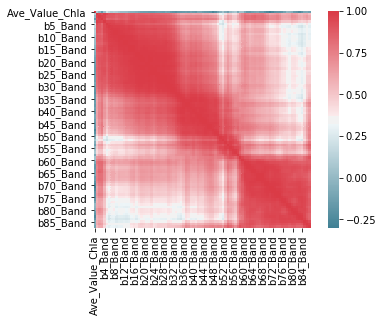

In [7]:
ax = seaborn.heatmap(correlation, cmap=seaborn.diverging_palette(220, 10, as_cmap=True), square = True, annot = False, linewidths = 0)
matplotlib.pyplot.show()

Many of the predictor variables are positive (bright red), which makes random forest a good choice as it can handle predictor variables that are dependent on each other in a way that minimizes bias.

Use the print command to show the sizes of the training and test datasets. Type labels for both and concatenate them with the string version of the variable.

In [8]:
print('Training Data Size = ' + str(in_train_df.shape[0]))
print('Test Data Size = ' + str(in_test_df.shape[0]))
print('Entire Dataset Size = ' + str(in_train_df.shape[0] + in_test_df.shape[0]))

Training Data Size = 6
Test Data Size = 4
Entire Dataset Size = 10


## Train Random Forest Regressor

### Train & Test Data

Train your random forest regressor using the training data you have created.

First, create the variable train_rfr to show the results of running the RandomForestRegressor command to create 500 trees. Then use the .fit argument to apply the forest results to the training data.

In [9]:
train_rfr = sklearn.ensemble.RandomForestRegressor(n_estimators = 500, oob_score = True, bootstrap = True)
independent_col = ['b1_Band', 'b2_Band', 'b3_Band', 'b4_Band', 'b5_Band', 'b6_Band', 'b7_Band', 'b8_Band', 'b9_Band',
              'b10_Band', 'b11_Band', 'b12_Band', 'b13_Band', 'b14_Band', 'b15_Band', 'b16_Band', 'b17_Band',
              'b18_Band', 'b19_Band', 'b20_Band', 'b21_Band', 'b22_Band', 'b23_Band', 'b24_Band', 'b25_Band', 'b26_Band',
              'b27_Band', 'b28_Band', 'b29_Band', 'b30_Band', 'b31_Band', 'b32_Band', 'b33_Band', 'b34_Band', 'b35_Band', 
              'b36_Band', 'b37_Band', 'b38_Band', 'b39_Band', 'b40_Band', 'b41_Band', 'b42_Band', 'b43_Band', 'b44_Band', 
              'b45_Band', 'b46_Band', 'b47_Band', 'b48_Band', 'b49_Band', 'b50_Band', 'b51_Band', 'b52_Band', 'b53_Band',
              'b54_Band', 'b55_Band', 'b56_Band', 'b57_Band', 'b58_Band', 'b59_Band', 'b60_Band', 'b61_Band', 'b62_Band',
              'b63_Band', 'b64_Band', 'b65_Band', 'b66_Band', 'b67_Band', 'b68_Band', 'b69_Band', 'b70_Band', 'b71_Band', 
              'b72_Band', 'b73_Band', 'b74_Band', 'b75_Band', 'b76_Band', 'b77_Band', 'b78_Band', 'b79_Band', 'b80_Band',
              'b81_Band', 'b82_Band', 'b83_Band', 'b84_Band', 'b85_Band', 'b86_Band', 'b87_Band']
dependent_col = ['Ave_Value_Chla']
train_rfr.fit(in_train_df[numpy.array(independent_col)], numpy.array(in_train_df[numpy.array(dependent_col)]).flatten())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

Run the classification again using the test dataset and place in a new variable, test_pred.

In [10]:
test_pred = train_rfr.predict(in_test_df[independent_col])
test_pred

array([4.25399619, 4.47988191, 4.35075083, 3.6374174 ])

create a variable, test_vars, to store the true values of the in_test_df dependent variable.

In [11]:
test_vars = numpy.array(in_test_df[dependent_col]).flatten()
test_vars

array([5.62214993, 3.45017987, 3.95554015, 4.31573137])

Check the accuracy of the result by calculating both RMSE and R^2.

In [12]:
test_pred_rmse = (sum((test_pred - test_vars)**2)/len(test_pred))**0.5
print("{:>16}{:5.2f}".format("RMSE: ", test_pred_rmse))
test_pred_rmse_conf = 1.96*test_pred_rmse
print("{:>15}{:6.2f}".format("RMSE 95% Conf.:", test_pred_rmse_conf))
test_pred_rsq = train_rfr.score(in_test_df[numpy.array(independent_col)], test_vars)
print("{:>15}{:6.2f}".format("R^2:",test_pred_rsq))

          RMSE:  0.94
RMSE 95% Conf.:  1.85
           R^2: -0.37


The prediction is not very strong with an R^2 of -0.4 and RMSE of 0.95. 95% of data predicted data should fall within +-1.86 of the prediction.

### Entire Dataset

We will accept these results and see what happens when we train the Random Forest Regressor on the entire 10-sample dataset.

In [13]:
dataset_rfr = sklearn.ensemble.RandomForestRegressor(n_estimators = 500, oob_score = True, bootstrap = True)
dataset_rfr.fit(in_dataset_df[numpy.array(independent_col)], numpy.array(in_dataset_df[numpy.array(dependent_col)]).flatten())
dataset_pred = train_rfr.predict(in_dataset_df[independent_col])
print("Predicted: {}".format(dataset_pred))
dataset_vars = numpy.array(in_dataset_df[dependent_col]).flatten()
print("Actual: {}".format(dataset_vars))

Predicted: [4.0940153  4.29388371 4.51587803 5.01835443 4.16970642 4.13753847
 4.45888863 4.28773443 3.34741148 3.63815415]
Actual: [4.00564275 5.62214993 4.74509997 5.4798699  4.17642997 3.92627022
 3.45017987 3.95554015 2.50479301 4.31573137]


In [14]:
dataset_pred_rmse = (sum((dataset_pred - dataset_vars)**2)/len(dataset_pred))**0.5
print("{:>16}{:5.2f}".format("RMSE: ", dataset_pred_rmse))
dataset_pred_rmse_conf = 1.96*dataset_pred_rmse
print("{:>15}{:6.2f}".format("RMSE 95% Conf.:", dataset_pred_rmse_conf))
dataset_pred_rsq = dataset_rfr.score(in_dataset_df[numpy.array(independent_col)], dataset_vars)
print("{:>15}{:6.2f}".format("R^2:",dataset_pred_rsq))

          RMSE:  0.66
RMSE 95% Conf.:  1.30
           R^2:  0.81


## Run Random Forest Regressor on Raster to Estimate Chl-a for Each Cell

Import the raster which contains the dataset to be predicted where the independent variables (band reflectance) are known and the dependent variable is unknown (chl-a concentration), as a numpy array.

First, define input variables.

In [16]:
in_rast = arcpy.Raster(r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\IRL_Masked')
in_rast_lowerleftpt = arcpy.Point(in_rast.extent.XMin, in_rast.extent.YMin)
in_rast_xsize = in_rast.meanCellWidth
in_rast_ysize = in_rast.meanCellHeight
in_rast_sptref = in_rast.spatialReference

Now create the raster array. Notice the output shape of in_rast_array.

In [17]:
in_rast_array = arcpy.RasterToNumPyArray(in_rast, nodata_to_value = None)
print("Shape: {}".format(in_rast_array.shape))
print("Data type: {}".format(in_rast_array.dtype))
print(in_rast_array)

Shape: (87, 201, 80)
Data type: int16
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In order to use in_rast_array transpose and reshape as input as a 2d array with the number of rows being the individual cells (201 x 70 = 16080) and the number of columns being the number of bands (87).

In [18]:
in_rast_array_reshape = in_rast_array.transpose(1, 2, 0).reshape(16080,87)
print("Shape: {}".format(in_rast_array_reshape.shape))
print("Data type: {}".format(in_rast_array_reshape.dtype))
print(in_rast_array_reshape)

Shape: (16080, 87)
Data type: int16
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Apply the Random Forest Regressor model created from the 10 sample points in dataset.rar. The output is a 1d array with the estimated values of Chl-a.

In [19]:
in_rast_pred = dataset_rfr.predict(in_rast_array_reshape)
print("Shape: {}".format(in_rast_pred.shape))
print("Data type: {}".format(in_rast_pred.dtype))
print(in_rast_pred)

Shape: (16080,)
Data type: float64
[4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]


Convert the 1d array back into a 2d array of shape 201, 80, where each record in the raster grid only has one value, the estimated value of chl-a for that cell.

In [20]:
in_rast_pred_reshape = in_rast_pred.reshape(201, 80)
print("Shape: {}".format(in_rast_pred_reshape.shape))
print("Data type: {}".format(in_rast_pred_reshape.dtype))
print(in_rast_pred_reshape)

Shape: (201, 80)
Data type: float64
[[4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]
 [4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]
 [4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]
 ...
 [4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]
 [4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]
 [4.26550856 4.26550856 4.26550856 ... 4.26550856 4.26550856 4.26550856]]


Convert the numpy array back to a raster.

In [22]:
arcpy.env.overwriteOutput = True
out_rast = arcpy.NumPyArrayToRaster(in_rast_pred_reshape, in_rast_lowerleftpt, in_rast_xsize, in_rast_ysize, value_to_nodata = 4.240109488239989)
out_rast.save(r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\IRL_Predicted_ChlA')
arcpy.management.DefineProjection(out_rast, in_rast_sptref)

<Result 'C:\\Users\\zieglerhm\\Documents\\Files\\Portfolio\\Estimate_Chla\\Predict_ChlA.gdb\\IRL_Predicted_ChlA'>